In [1]:
import os, io, sys, types

In [2]:
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [3]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [5]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [6]:
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [7]:
sys.meta_path.append(NotebookFinder())

importing Jupyter notebook from unknot.ipynb
The parts of the user's data (and their dimensions):
Every example has its timestamp, indicating the minute when the example was recorded
User 00EABED2-271D-49D8-B599-1D4A09240601 has 2287 examples (~2287 minutes of behavior)
The primary data files have 225 different sensor-features
X is the feature matrix. Each row is an example and each column is a sensor-feature:
The primary data files have 51 context-labels
Y is the binary label-matrix. Each row represents an example and each column represents a label.
Value of 1 indicates the label is relevant for the example:
Y is accompanied by the missing-label-matrix, M.
Value of 1 indicates that it is best to consider an entry (example-label pair) as 'missing':
How many examples does this user have for each contex-label:
--------------------
label PHONE_ON_TABLE - 1594 minutes
label OR_indoors - 1284 minutes
label SITTING - 1106 minutes
label LOC_home - 995 minutes
label LYING_DOWN - 657 minutes
la

unknot.ipynb:13: RuntimeWarning: invalid value encountered in true_divide
  },


Label-pairs with higher color value tend to occur together more.
  0) Acc        raw_acc:magnitude_stats:mean
  1) Acc        raw_acc:magnitude_stats:std
  2) Acc        raw_acc:magnitude_stats:moment3
  3) Acc        raw_acc:magnitude_stats:moment4
  4) Acc        raw_acc:magnitude_stats:percentile25
  5) Acc        raw_acc:magnitude_stats:percentile50
  6) Acc        raw_acc:magnitude_stats:percentile75
  7) Acc        raw_acc:magnitude_stats:value_entropy
  8) Acc        raw_acc:magnitude_stats:time_entropy
  9) Acc        raw_acc:magnitude_spectrum:log_energy_band0
 10) Acc        raw_acc:magnitude_spectrum:log_energy_band1
 11) Acc        raw_acc:magnitude_spectrum:log_energy_band2
 12) Acc        raw_acc:magnitude_spectrum:log_energy_band3
 13) Acc        raw_acc:magnitude_spectrum:log_energy_band4
 14) Acc        raw_acc:magnitude_spectrum:spectral_entropy
 15) Acc        raw_acc:magnitude_autocorrelation:period
 16) Acc        raw_acc:magnitude_autocorrelation:normalized_ac
 17

The phone-state (PS) features are represented as binary indicators:


unknot.ipynb:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  "    # Isolate the headline columns:\n",
C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
unknot.ipynb:29: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  "    headline = csv_str[:csv_str.index('\\n')];\n",
unknot.ipynb:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  "    # Isolate the headline columns:\n",
unknot.ipynb:29: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  "    headline = csv_str[:csv_str.index('\\n')];\n",


== Projected the features to 52 features from the sensors: Acc, Gyro
== Training with 2119 examples. For label 'Walking' we have 163 positive and 1956 negative examples.
== Projected the features to 52 features from the sensors: Acc, Gyro
== Testing with 2119 examples. For label 'Walking' we have 163 positive and 1956 negative examples.
----------
Accuracy*:         0.87
Sensitivity (TPR): 0.88
Specificity (TNR): 0.87
Balanced accuracy: 0.88
Precision**:       0.36
----------
* The accuracy metric is misleading - it is dominated by the negative examples (typically there are many more negatives).
** Precision is very sensitive to rare labels. It can cause misleading results when averaging precision over different labels.


C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


== Projected the features to 52 features from the sensors: Acc, Gyro
== Testing with 8315 examples. For label 'Walking' we have 193 positive and 8122 negative examples.
----------
Accuracy*:         0.84
Sensitivity (TPR): 0.87
Specificity (TNR): 0.83
Balanced accuracy: 0.85
Precision**:       0.11
----------
* The accuracy metric is misleading - it is dominated by the negative examples (typically there are many more negatives).
** Precision is very sensitive to rare labels. It can cause misleading results when averaging precision over different labels.


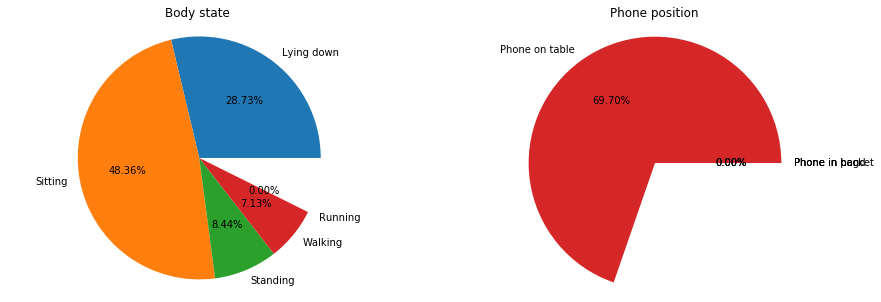

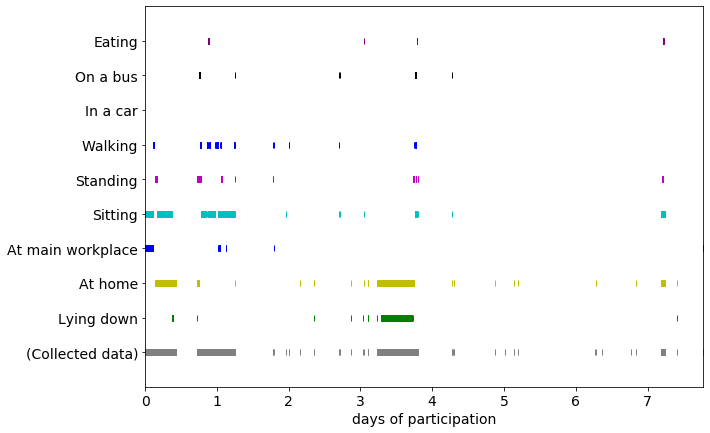

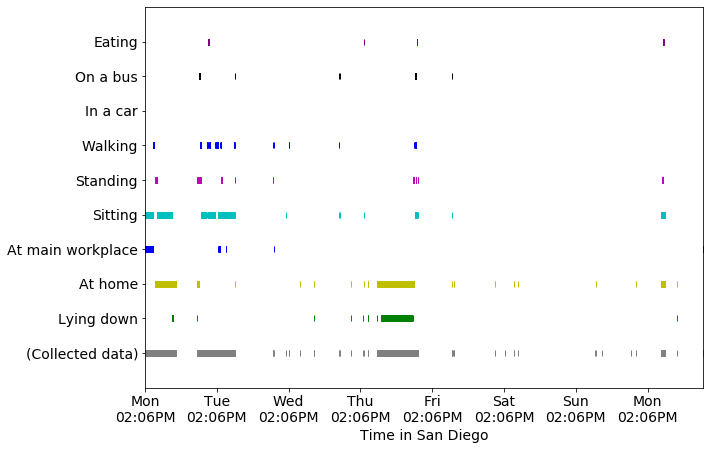

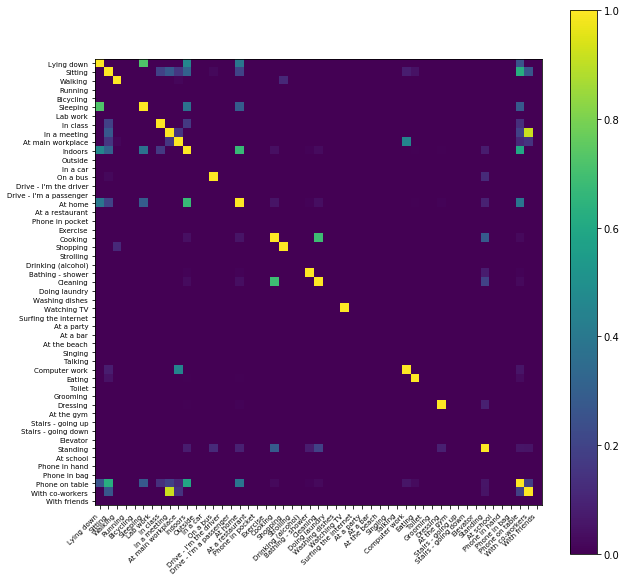

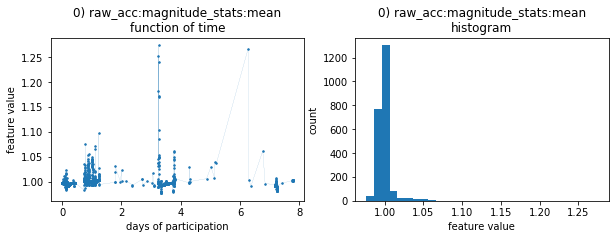

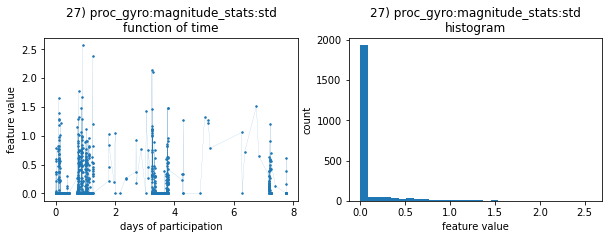

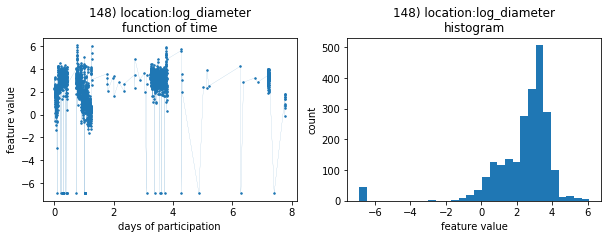

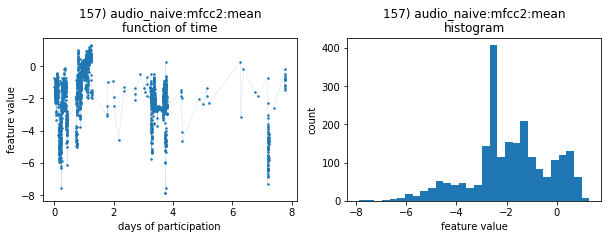

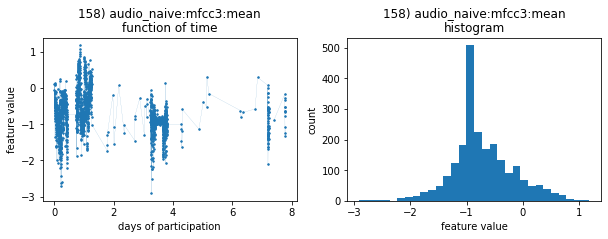

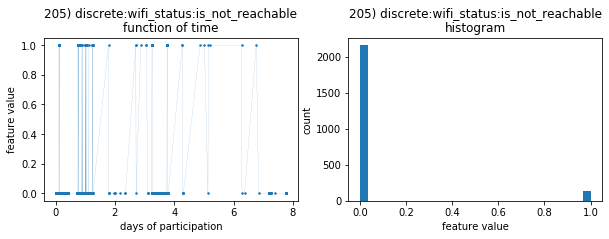

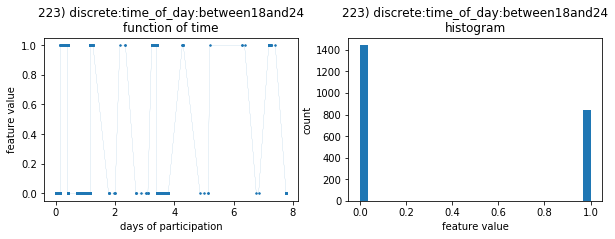

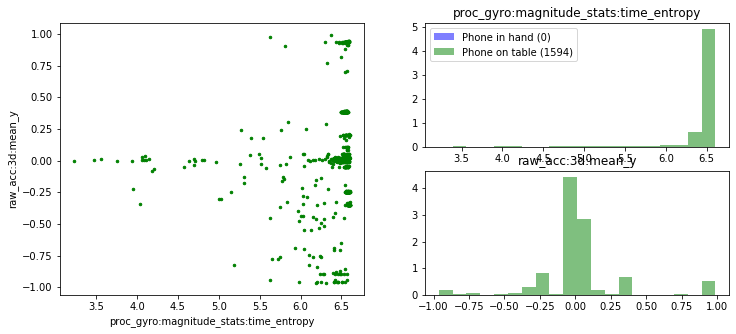

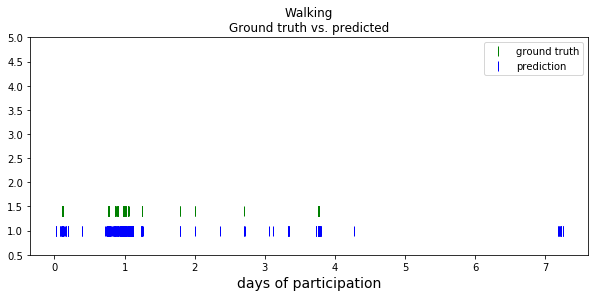

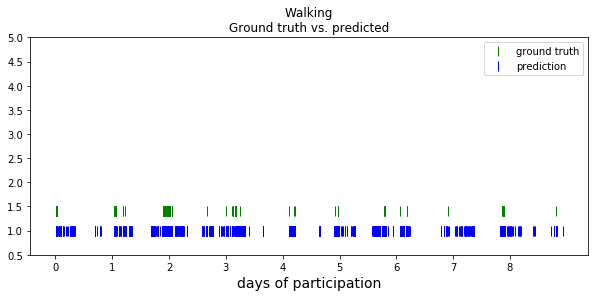

In [8]:
import unknot as un

== Projected the features to 52 features from the sensors: Acc, Gyro
== Training with 2119 examples. For label 'Walking' we have 163 positive and 1956 negative examples.
== Projected the features to 52 features from the sensors: Acc, Gyro
== Testing with 2119 examples. For label 'Walking' we have 163 positive and 1956 negative examples.
----------
Accuracy*:         0.87
Sensitivity (TPR): 0.88
Specificity (TNR): 0.87
Balanced accuracy: 0.88
Precision**:       0.36
----------
* The accuracy metric is misleading - it is dominated by the negative examples (typically there are many more negatives).
** Precision is very sensitive to rare labels. It can cause misleading results when averaging precision over different labels.


C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


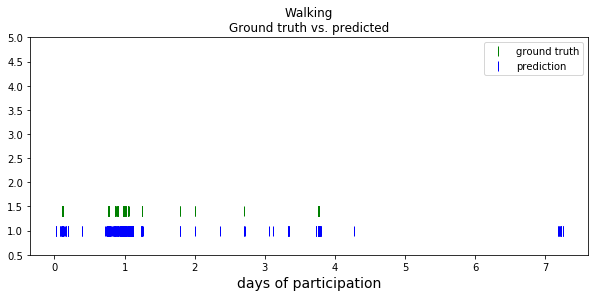

In [12]:
sensors_to_use = ['Acc','Gyro'];
target_label = 'FIX_walking';
model = un.train_model(un.X,un.Y,un.M,un.feat_sensor_names,un.label_names,un.sensors_to_use,target_label);
un.test_model(un.X,un.Y,un.M,un.timestamps,un.feat_sensor_names,un.label_names,model);

== Projected the features to 52 features from the sensors: Acc, Gyro
== Training with 2119 examples. For label 'Sitting' we have 1106 positive and 1013 negative examples.
== Projected the features to 52 features from the sensors: Acc, Gyro
== Testing with 2119 examples. For label 'Walking' we have 1106 positive and 1013 negative examples.
----------
Accuracy*:         0.80
Sensitivity (TPR): 0.84
Specificity (TNR): 0.75
Balanced accuracy: 0.79
Precision**:       0.79
----------
* The accuracy metric is misleading - it is dominated by the negative examples (typically there are many more negatives).
** Precision is very sensitive to rare labels. It can cause misleading results when averaging precision over different labels.


C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


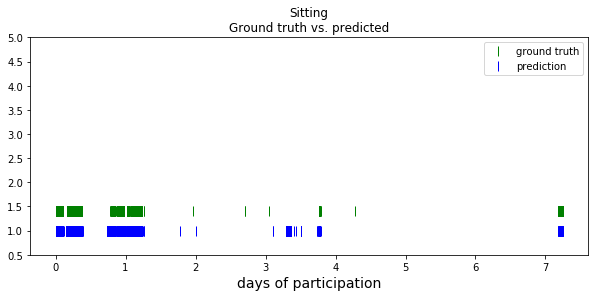

In [13]:
sensors_to_use = ['Acc','Gyro'];
target_label = 'SITTING';
model = un.train_model(un.X,un.Y,un.M,un.feat_sensor_names,un.label_names,un.sensors_to_use,target_label);
un.test_model(un.X,un.Y,un.M,un.timestamps,un.feat_sensor_names,un.label_names,model);

== Projected the features to 52 features from the sensors: Acc, Gyro
== Training with 2119 examples. For label 'Sleeping' we have 477 positive and 1642 negative examples.
== Projected the features to 52 features from the sensors: Acc, Gyro
== Testing with 2119 examples. For label 'Walking' we have 477 positive and 1642 negative examples.
----------
Accuracy*:         0.93
Sensitivity (TPR): 0.94
Specificity (TNR): 0.93
Balanced accuracy: 0.94
Precision**:       0.79
----------
* The accuracy metric is misleading - it is dominated by the negative examples (typically there are many more negatives).
** Precision is very sensitive to rare labels. It can cause misleading results when averaging precision over different labels.


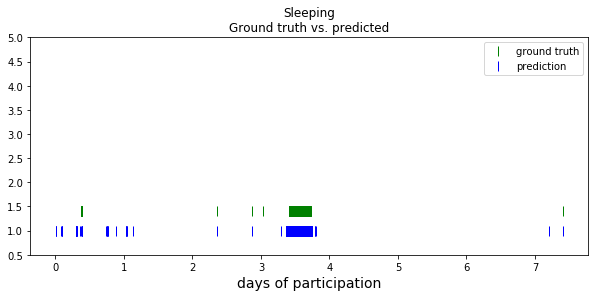

In [15]:
sensors_to_use = ['Acc','Gyro'];
target_label = 'SLEEPING';
model = un.train_model(un.X,un.Y,un.M,un.feat_sensor_names,un.label_names,un.sensors_to_use,target_label);
un.test_model(un.X,un.Y,un.M,un.timestamps,un.feat_sensor_names,un.label_names,model);